<a href="https://colab.research.google.com/github/HugoFrajacomo/AprendizagemDeMaquina/blob/main/Vinho_Tinto_GaussianNB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploração Inicial e Preprocessamento dos Dados

# Idealização do estudo

O presente estudo tem como objetivo principal analisar as características dos vinhos tintos e compreender sua distribuição através de visualizações. Para isso, serão realizadas as seguintes etapas:


*   Categorização de vinhos: Será desenvolvida uma classificação dos vinhos com base no açúcar residual e em outras propriedades químicas, visando facilitar o posicionamento no mercado.


  Para categorização dos vinhos deve-se criar duas colunas:
  

  1) categoria_doçura com o seguinte critério


1.   Sec (seco): Vinhos com até 4 g/L de açúcar residual.
2.   Demi-sec (meio seco): Vinhos com açúcar residual entre 4 e 12 g/L.
3.   Moelleux (doce): Vinhos com açúcar residual entre 12 e 45 g/L.
4.   Liquoreux (muito doce): Vinhos com açúcar residual acima de 45 g/L.

  2) Class_mercado com os seguintes critérios


1.   BOURGOGNE: Teor alcoólico acima de 12%, densidade abaixo de 0.99 e qualidade acima de 7.
2.   BORDEAUX: Teor alcoólico entre 10% e 12%, densidade entre 0.99 e 0.995, e
qualidade entre 6 e 7.
3.   AOC: Teor alcoólico entre 9% e 10%, densidade entre 0.995 e 1.0, e qualidade entre 5 e 6.
4.   VDQS: Teor alcoólico entre 8% e 9%, densidade maior que 1.0, e qualidade entre 4 e 5.
5.   VIN DE TABLE: Teor alcoólico inferior a 8% ou qualidade inferior a 4


*   Treinamento de modelo preditivo: Utilizaremos o algoritmo Gaussian Naive Bayes para criar um modelo capaz de prever a categoria dos vinhos, com base nas características identificadas.

*   Avaliação do modelo: O desempenho do modelo será avaliado por meio da análise da matriz de confusão, permitindo identificar acertos e erros nas classificações realizadas.

Este estudo pretende contribuir para uma melhor compreensão dos vinhos tintos, auxiliando produtores e comerciantes na classificação e promoção de seus produtos, além de fornecer aos consumidores informações mais precisas para a escolha de vinhos que atendam às suas preferências.

## Importação de dependências

In [ ]:
!pip install plotly --upgrade

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

## Importação de dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
base_vinho = pd.read_csv('/content/drive/MyDrive/Prova 1 - IA/qualidade_vinhos_tintos.csv', sep=';')

In [ ]:
base_vinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [ ]:
base_vinho.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Verificando valores nulos

In [ ]:
base_vinho.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


## identificação de outliers com boxplot

O boxplot considerado os valores de mediana, mínimos e máximos para indentificação de registros fora do padrão. Também é possivel gerar outras análises através da analise do quartil.

### Verificando a coluna residual sugar

Valor mínimo: 0.9
Valor máximo: 3.65


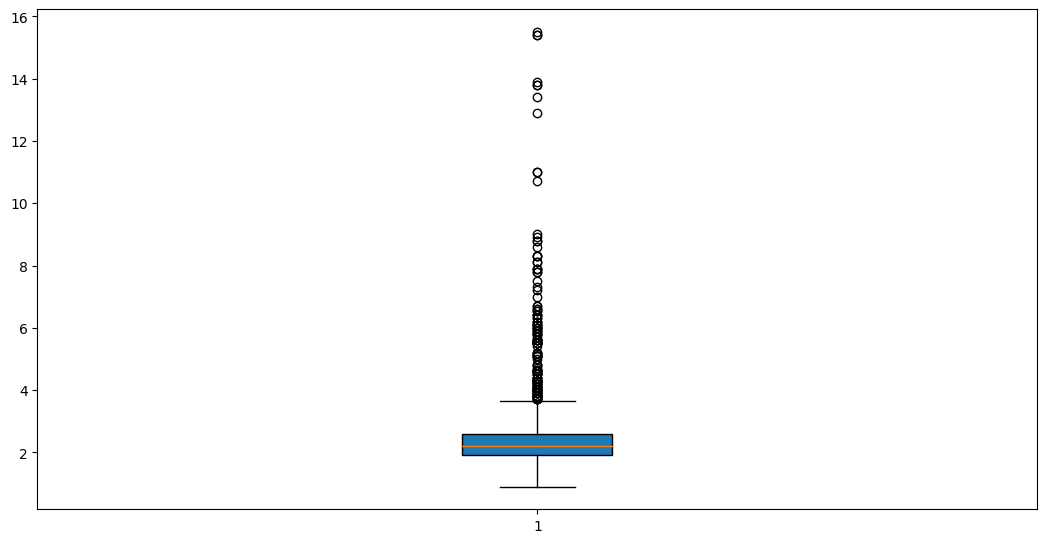

In [ ]:
janela = plt.figure(figsize=(10,5))
grafico = janela.add_axes([0,0,1,1])
box = grafico.boxplot(base_vinho['residual sugar'], patch_artist=True)
whiskers = [item.get_ydata() for item in box['whiskers']]
minimo = whiskers[0][1]
maximo = whiskers[1][1]
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")

In [ ]:
outliers_acima = sum(base_vinho['residual sugar'] > 3.65)
outliers_acima

155

Embora o residual sugar contenha valores que poderiam ser considerados outliers da amostra. A classificação de venhos quanto sua docura preve valores de vinhos com açucar residual acima de 45 gramas/litro. Desta forma os valores que estão fora da concentração de dados principal serão mantidos pois podem ser classificados.

### Verificando a coluna density

Valor mínimo: 0.99235
Valor máximo: 1.001


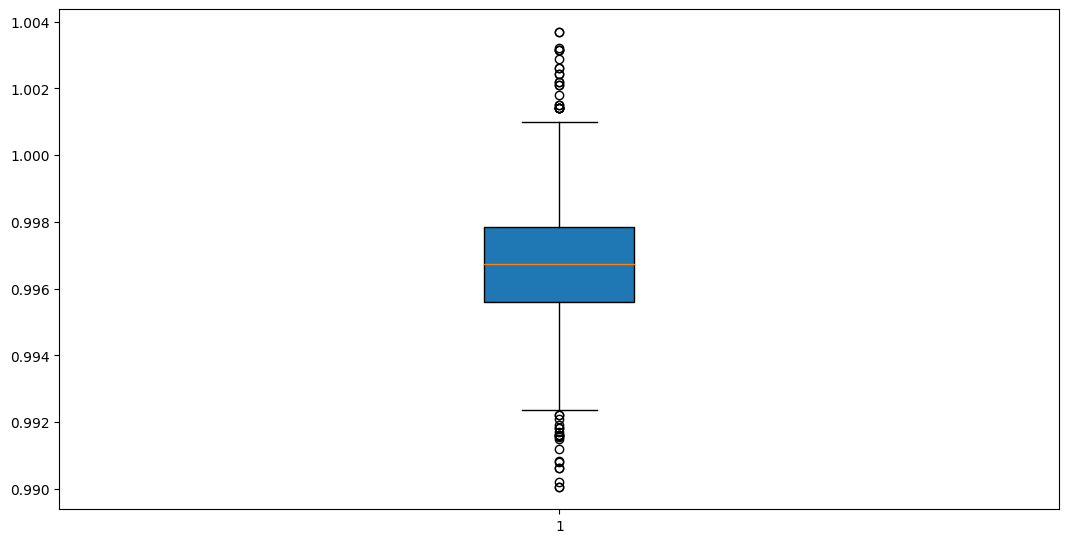

In [ ]:
janela = plt.figure(figsize=(10,5))
grafico = janela.add_axes([0,0,1,1])
box = grafico.boxplot(base_vinho['density'], patch_artist=True)
whiskers = [item.get_ydata() for item in box['whiskers']]
minimo = whiskers[0][1]
maximo = whiskers[1][1]
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")

In [ ]:
outliers_acima1 = sum(base_vinho['density'] > 1.001)
outliers_acima2 = sum(base_vinho['density'] < 0.99235)
outliers_acima = outliers_acima1 + outliers_acima2
outliers_acima

45

Para os valores de densidade, sua alteração acima da máxima e abaixo da máxima são muito próximos do valor da grande parte dos dados, dessa forma, não serão retirados da amostra. A inflência da diferença de valores não é tão relevante ao ponto de haver necessidade de retirar os valores.

### Verificando a coluna alcohol

Valor mínimo: 8.4
Valor máximo: 13.5


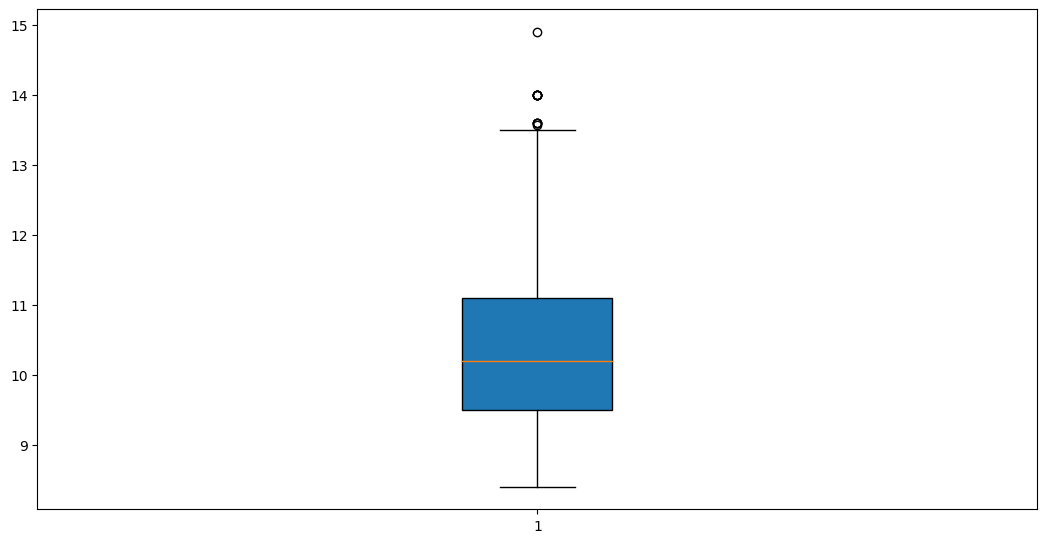

In [ ]:
janela = plt.figure(figsize=(10,5))
grafico = janela.add_axes([0,0,1,1])
box = grafico.boxplot(base_vinho['alcohol'], patch_artist=True)
whiskers = [item.get_ydata() for item in box['whiskers']]
minimo = whiskers[0][1]
maximo = whiskers[1][1]
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")

In [ ]:
outliers_acima = sum(base_vinho['alcohol'] > 13.5)
outliers_acima

13

A amostra apresenta poucos valores fora da massa de dados. Em um senário real, o limite máximo de alcool nos vinhos variam de 18% a 22%, como as amostras de outlier não apresentam valores superiores ao limite máximo da classificação da bebida, os valores também serão mantidos.

### Verificando a coluna quality

Valor mínimo: 4.0
Valor máximo: 7.0


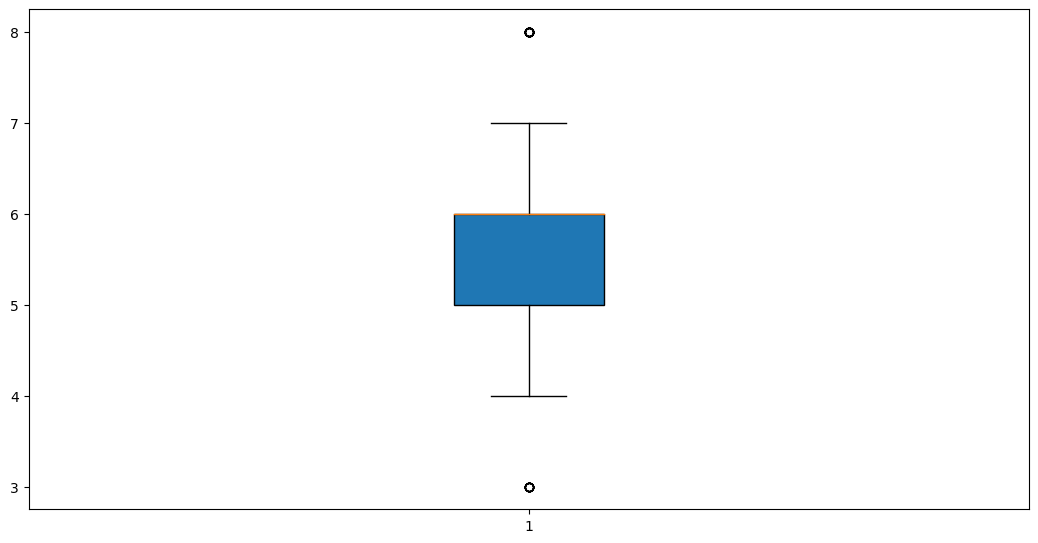

In [ ]:
janela = plt.figure(figsize=(10,5))
grafico = janela.add_axes([0,0,1,1])
box = grafico.boxplot(base_vinho['quality'], patch_artist=True)
whiskers = [item.get_ydata() for item in box['whiskers']]
minimo = whiskers[0][1]
maximo = whiskers[1][1]
print(f"Valor mínimo: {minimo}")
print(f"Valor máximo: {maximo}")

In [ ]:
outliers_acima = sum(base_vinho['quality'] > 7.0)
outliers_acima

18

# Análise do boxplot

 Os dados de interesse para o trainamento são: residual sugar, density, alcohol, quality.

 Ao analisar o açucar residual percebemos que a amostra apresenta em sua grande maioria dados que se enquadram nas categorias:



*   Sec (seco): Vinhos com até 4 g/L de açúcar residual.
*   Demi-sec (meio seco): Vinhos com açúcar residual entre 4 e 12 g/L.


  Já para vinhos com maior teor de açucar residual há poucos dados na amostra o que dificultaria a classificação da categoria com menos amostras. São elas:


*   ○ Mœlleux (doce): Vinhos com açúcar residual entre 12 e 45 g/L.
*   ○ Liquoreux (muito doce): Vinhos com açúcar residual acima de 45 g/L.







# Criando colunas para classificar o doçura do vinho

In [ ]:
# Adicionar uma nova coluna com um valor padrão (ou calculado)
#base_vinho['categoria_doçura'] =

def categorize_sugar(residual_sugar):
    if residual_sugar <= 4:
        return 'Sec (seco)'
    elif 4 < residual_sugar <= 12:
        return 'Demi-sec (meio seco)'
    elif 12 < residual_sugar <= 45:
        return 'Mœlleux (doce)'
    else:
        return 'Liquoreux (muito doce)'

base_vinho['categoria_doçura'] = base_vinho['residual sugar'].apply(categorize_sugar)
base_vinho.value_counts('categoria_doçura')

,count
categoria_doçura,
Sec (seco),1474
Demi-sec (meio seco),117
Mœlleux (doce),8


Como vimos a tendência da classificação será definir o vinho como seco, polo número total de representantes na amostra.

# Criando coluna da classificação de mercado

In [ ]:
def classify_wine(row):
    alcohol = row['alcohol']
    density = row['density']
    quality = row['quality']

    if alcohol > 12 and density < 0.99 and quality > 7:
        return 'BOURGOGNE'
    elif 10 <= alcohol <= 12 and 0.99 <= density <= 0.995 and 6 <= quality <= 7:
        return 'BORDEAUX'
    elif 9 <= alcohol < 10 and 0.995 <= density <= 1.0 and 5 <= quality <= 6:
        return 'AOC'
    elif 8 <= alcohol < 9 and density > 1.0 and 4 <= quality <= 5:
        return 'VDQS'
    elif alcohol < 8 or quality < 4:
        return 'VIN DE TABLE'
    else:
        return 'Outros Tipos'

base_vinho['categoria_classe'] = base_vinho.apply(classify_wine, axis=1)

base_vinho.value_counts('categoria_classe')

,count
categoria_classe,
Outros Tipos,896
AOC,591
BORDEAUX,100
VIN DE TABLE,10
VDQS,2


## **IMPORTANTE!!!!!!!!**

Definção de vinhos "Outros Tipos": São vinhos que não tiveram seus parâmetros enquadrados nos requisitos fornecidos pelo escopo apresentado.

Seguindo as instruções de classificação de vinhos no documento em anexo a prova, a maioria das amostras não se enquadram em nenhuma das categorias de vinho.

Destaforma, a classificação tenderá para definir mais amostras como "outros tipos".

# Visualação de dados

## Histograma

### Residual Sugar

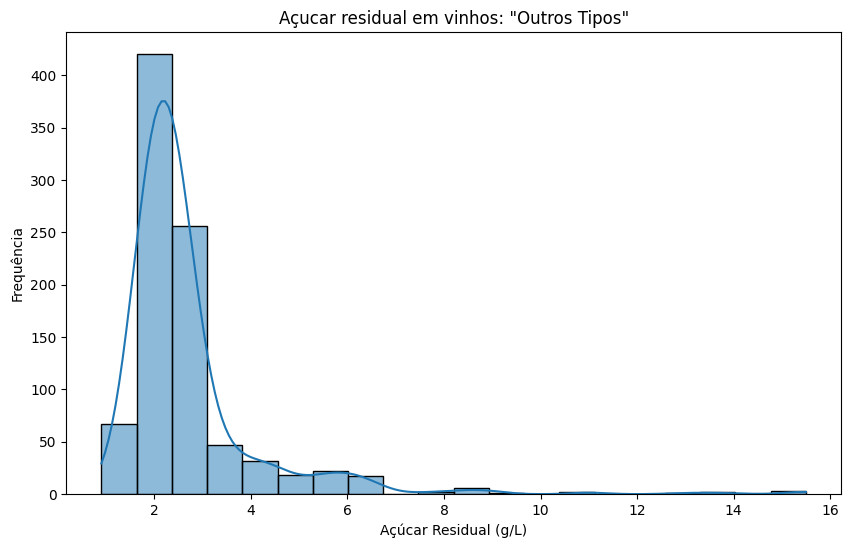

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'Outros Tipos'], x='residual sugar', bins=20, kde=True)
plt.xlabel('Açúcar Residual (g/L)')
plt.ylabel('Frequência')
plt.title('Açucar residual em vinhos: "Outros Tipos"')
plt.show()

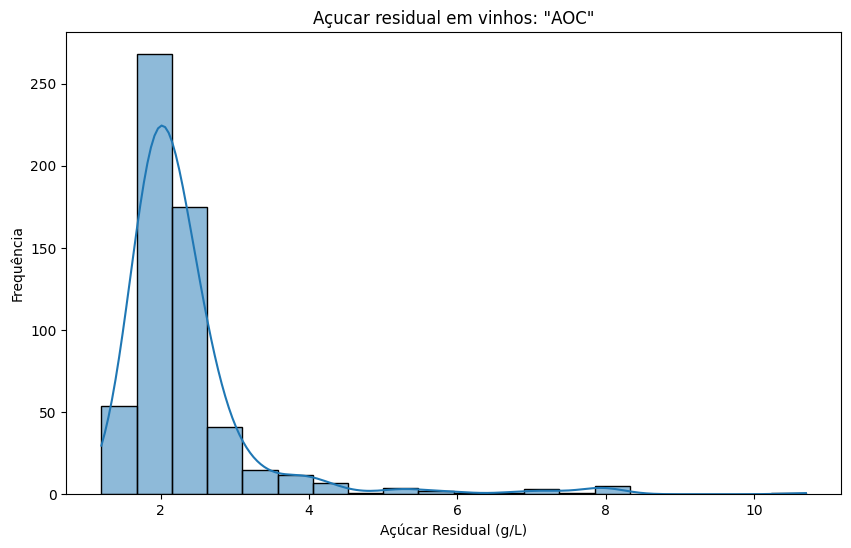

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'AOC'], x='residual sugar', bins=20, kde=True)
plt.xlabel('Açúcar Residual (g/L)')
plt.ylabel('Frequência')
plt.title('Açucar residual em vinhos: "AOC"')
plt.show()

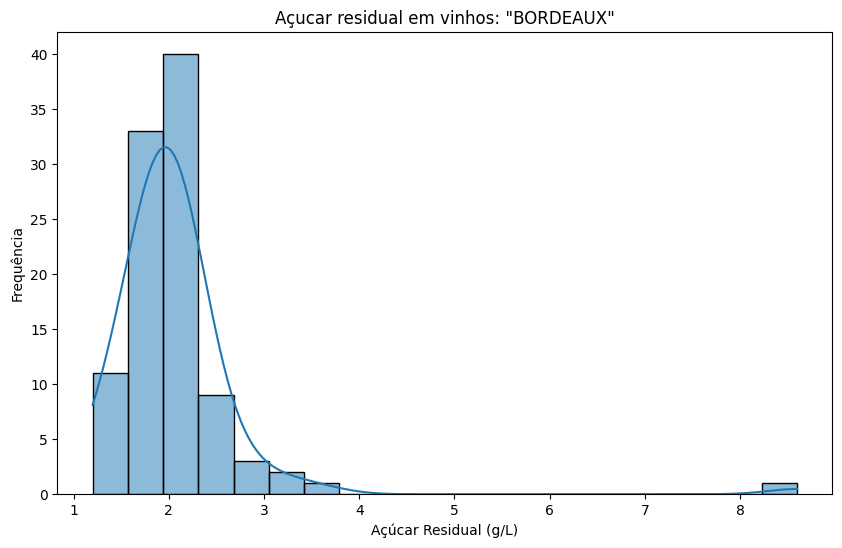

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'BORDEAUX'], x='residual sugar', bins=20, kde=True)
plt.xlabel('Açúcar Residual (g/L)')
plt.ylabel('Frequência')
plt.title('Açucar residual em vinhos: "BORDEAUX"')
plt.show()


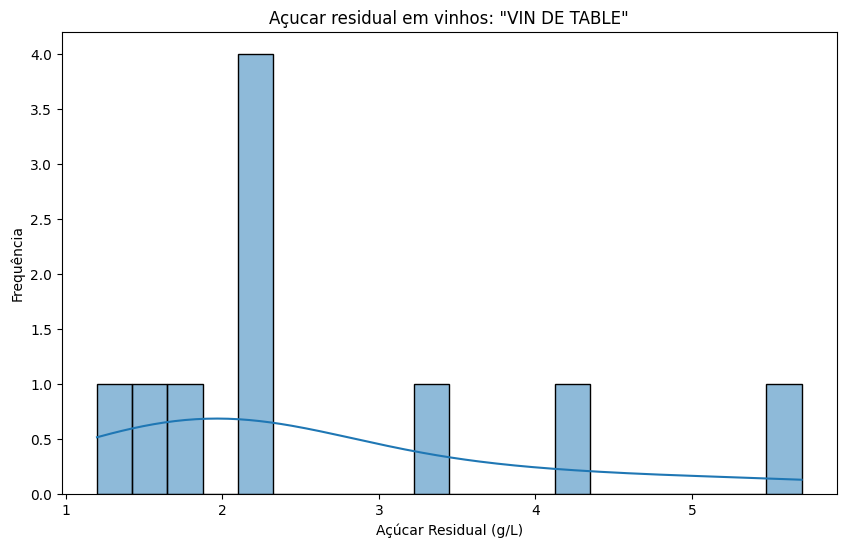

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'VIN DE TABLE'], x='residual sugar', bins=20, kde=True)
plt.xlabel('Açúcar Residual (g/L)')
plt.ylabel('Frequência')
plt.title('Açucar residual em vinhos: "VIN DE TABLE"')
plt.show()


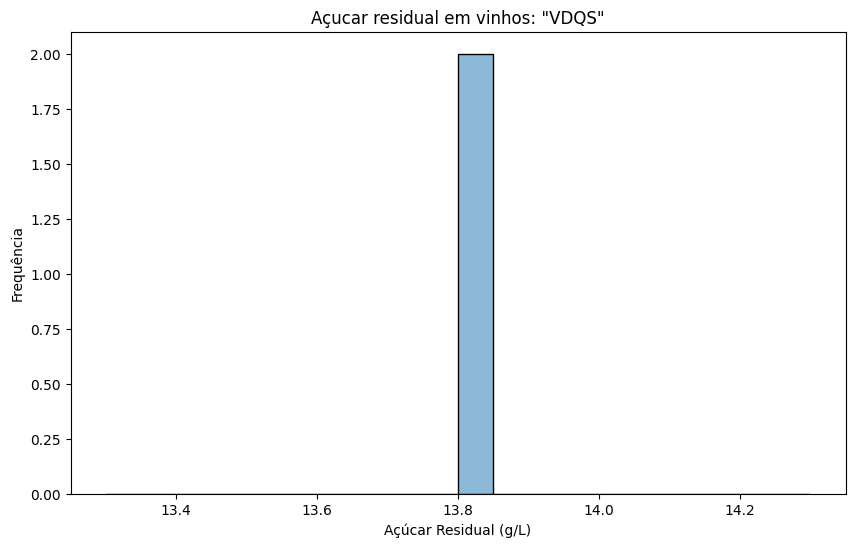

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'VDQS'], x='residual sugar', bins=20, kde=True)
plt.xlabel('Açúcar Residual (g/L)')
plt.ylabel('Frequência')
plt.title('Açucar residual em vinhos: "VDQS"')
plt.show()

### Alcohol

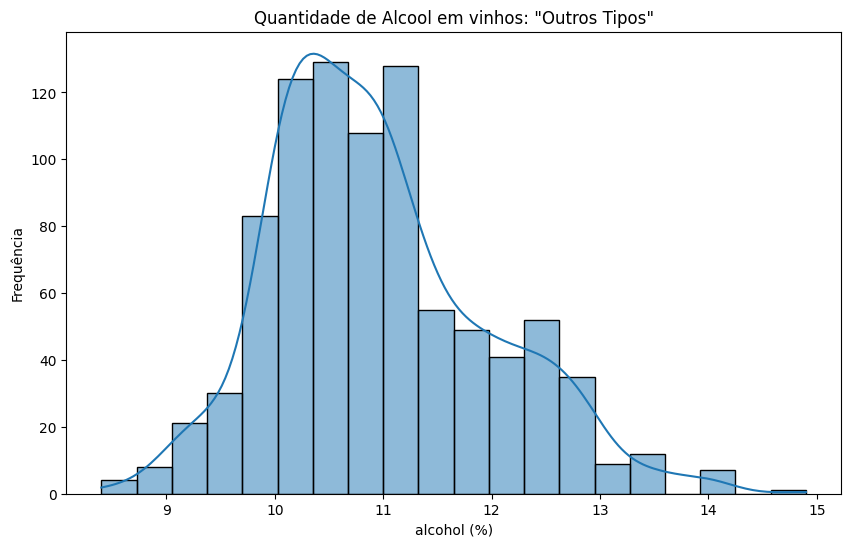

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'Outros Tipos'], x='alcohol', bins=20, kde=True)
plt.xlabel('alcohol (%)')
plt.ylabel('Frequência')
plt.title('Quantidade de Alcool em vinhos: "Outros Tipos"')
plt.show()

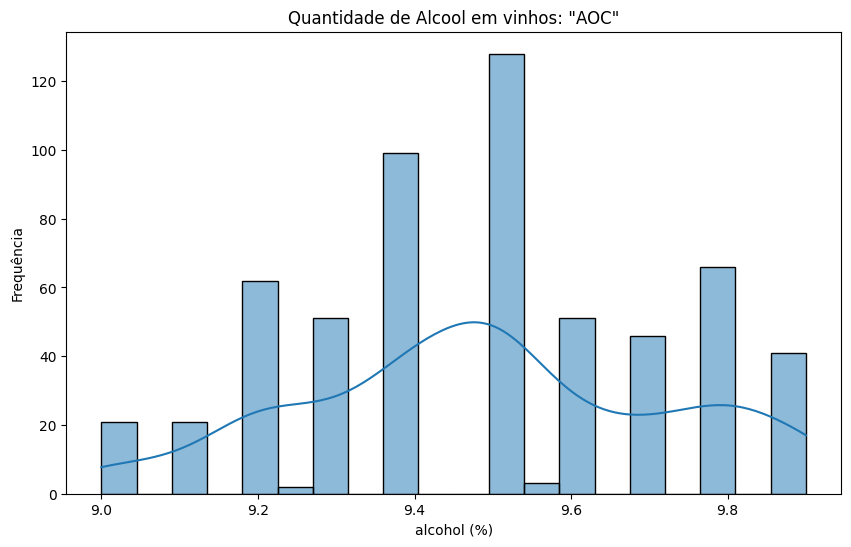

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'AOC'], x='alcohol', bins=20, kde=True)
plt.xlabel('alcohol (%)')
plt.ylabel('Frequência')
plt.title('Quantidade de Alcool em vinhos: "AOC"')
plt.show()

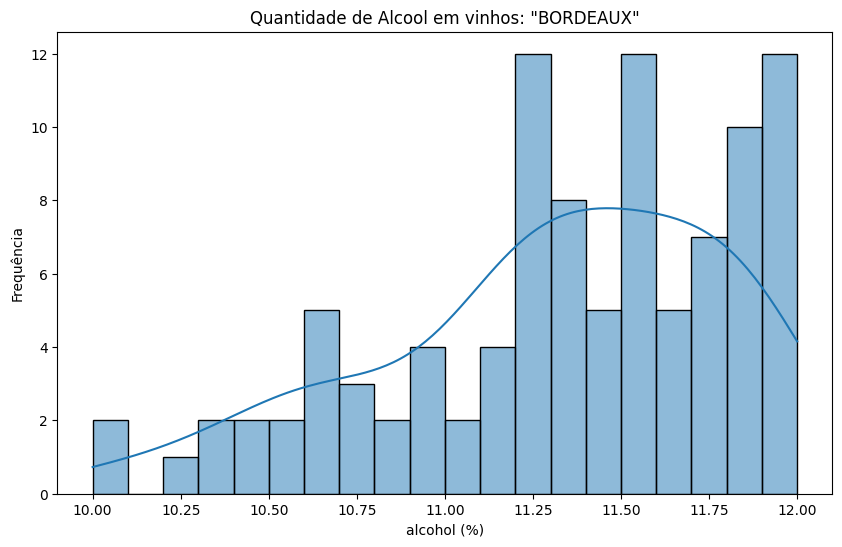

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'BORDEAUX'], x='alcohol', bins=20, kde=True)
plt.xlabel('alcohol (%)')
plt.ylabel('Frequência')
plt.title('Quantidade de Alcool em vinhos: "BORDEAUX"')
plt.show()

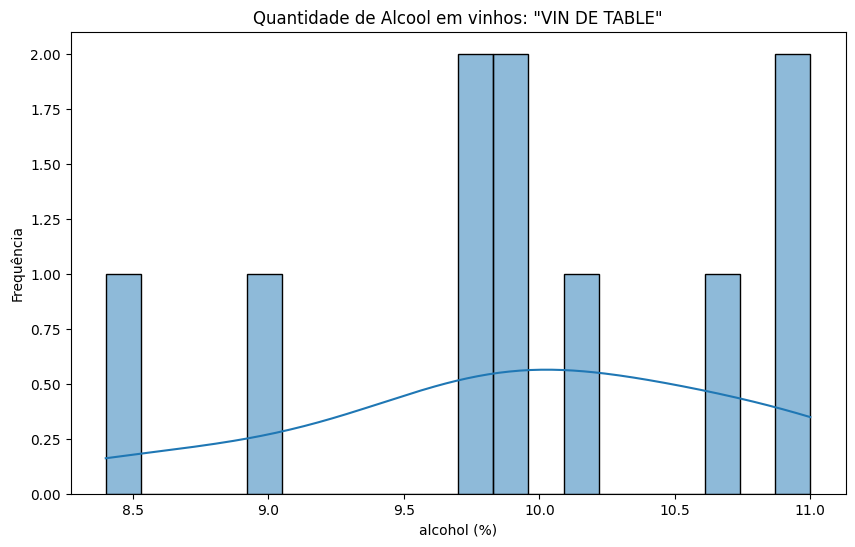

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'VIN DE TABLE'], x='alcohol', bins=20, kde=True)
plt.xlabel('alcohol (%)')
plt.ylabel('Frequência')
plt.title('Quantidade de Alcool em vinhos: "VIN DE TABLE"')
plt.show()

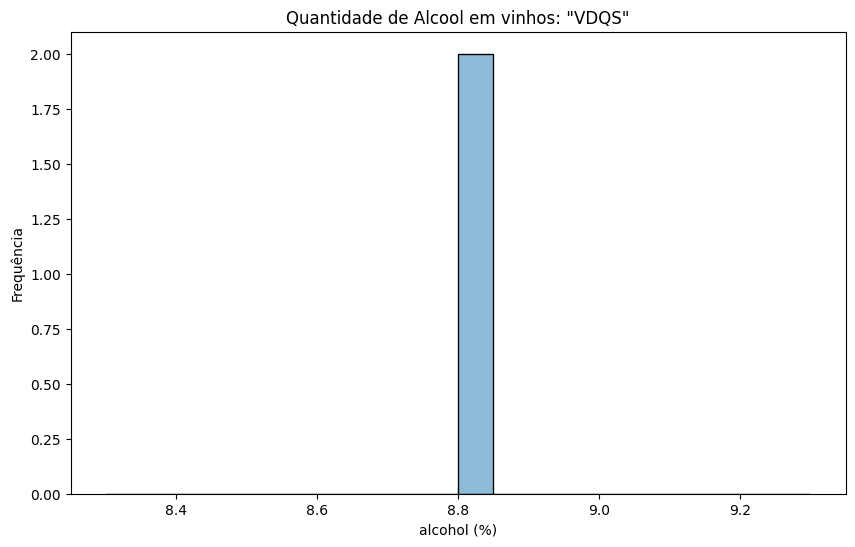

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'VDQS'], x='alcohol', bins=20, kde=True)
plt.xlabel('alcohol (%)')
plt.ylabel('Frequência')
plt.title('Quantidade de Alcool em vinhos: "VDQS"')
plt.show()

### Densidade

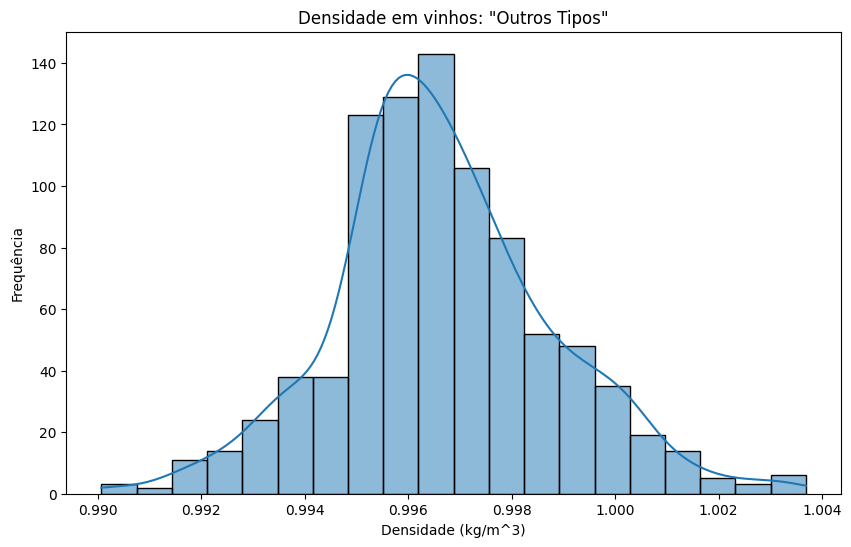

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'Outros Tipos'], x='density', bins=20, kde=True)
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Frequência')
plt.title('Densidade em vinhos: "Outros Tipos"')
plt.show()

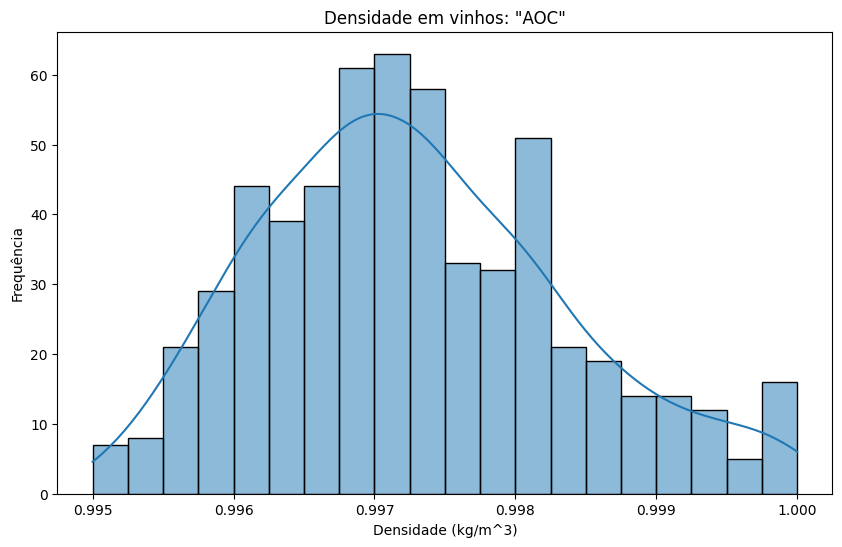

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'AOC'], x='density', bins=20, kde=True)
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Frequência')
plt.title('Densidade em vinhos: "AOC"')
plt.show()

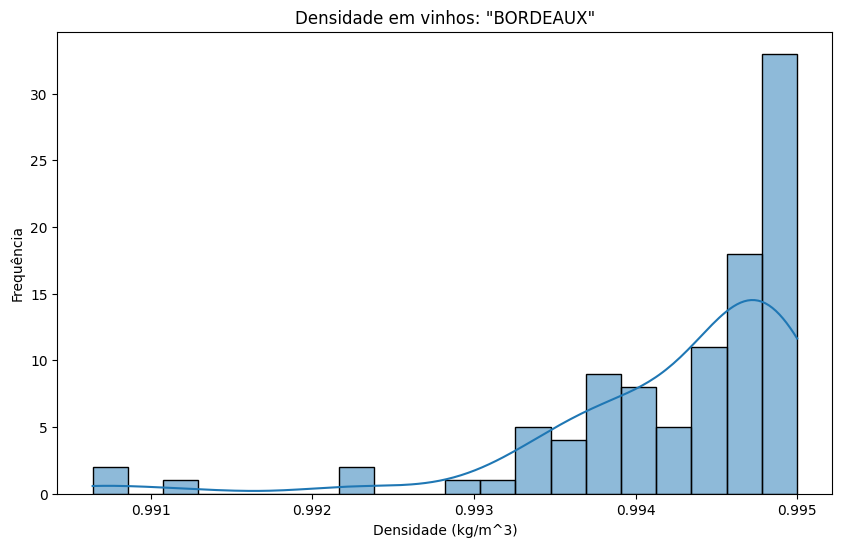

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'BORDEAUX'], x='density', bins=20, kde=True)
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Frequência')
plt.title('Densidade em vinhos: "BORDEAUX"')
plt.show()

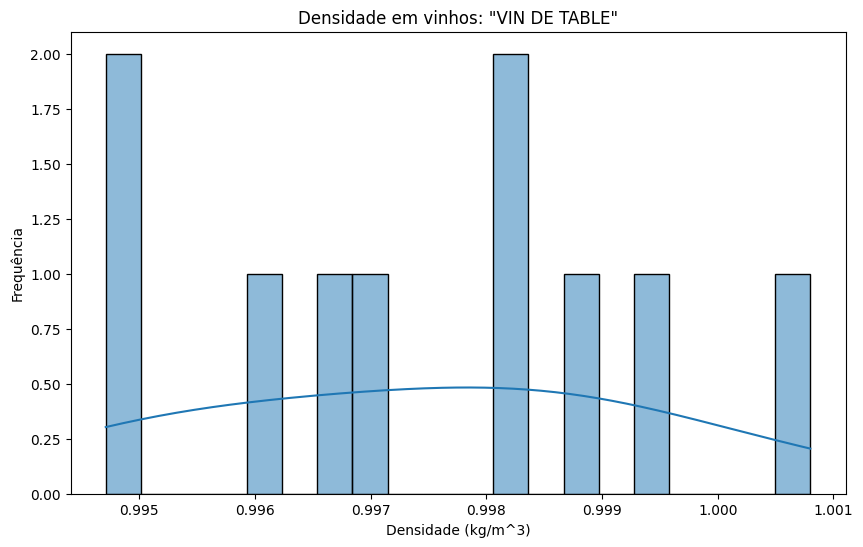

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'VIN DE TABLE'], x='density', bins=20, kde=True)
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Frequência')
plt.title('Densidade em vinhos: "VIN DE TABLE"')
plt.show()

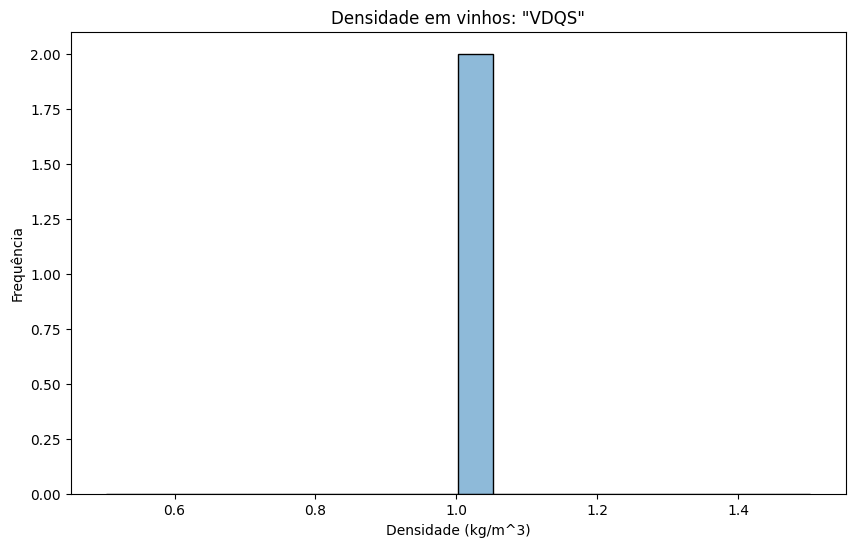

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(base_vinho[base_vinho['categoria_classe'] == 'VDQS'], x='density', bins=20, kde=True)
plt.xlabel('Densidade (kg/m^3)')
plt.ylabel('Frequência')
plt.title('Densidade em vinhos: "VDQS"')
plt.show()

## Treemap

Cacular a média de quantidade por categoria de vinho

In [ ]:
base_vinho_grouped = base_vinho.groupby('categoria_classe', as_index=False).agg({
    'quality': 'mean',
    'alcohol': 'size'
}).rename(columns={'alcohol': 'count', 'quality': 'mean_quality'})

In [ ]:
TreeMap = px.treemap(base_vinho_grouped,
                     path=['categoria_classe'],
                     values='count',
                     color='mean_quality',
                     color_continuous_scale='RdYlGn',
                     title='Proporção de vinhos por categoria e sua média de qualidade')
TreeMap.show()

## Parallel Categories

In [ ]:
parallel_categories = px.parallel_categories(
    base_vinho,
    dimensions=['categoria_doçura', 'alcohol', 'categoria_classe'],
    color="density",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        'categoria_doçura': 'Categoria de Doçura',
        'categoria_classe': 'Categoria de Vinho'
    },
    title="Relações entre Categoria Doçura e Categoria do vinho com referencia a quantidade de alcool"
)

parallel_categories.show()

In [ ]:
parallel_categories = px.parallel_categories(
    base_vinho,
    dimensions=['categoria_doçura', 'categoria_classe'],
    color="density",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        'categoria_doçura': 'Categoria de Doçura',
        'categoria_classe': 'Categoria de Vinho'
    },
    title="Relações entre Categoria Doçura e Categoria do vinho com referencia a Densidade"
)

parallel_categories.show()

In [ ]:
parallel_categories = px.parallel_categories(
    base_vinho,
    dimensions=['categoria_doçura', 'categoria_classe'],
    color="alcohol",
    color_continuous_scale=px.colors.sequential.Inferno,
    labels={
        'categoria_doçura': 'Categoria de Doçura',
        'categoria_classe': 'Categoria de Vinho'
    },
    title="Relações entre Categoria Doçura e Categoria do vinho com referencia a Densidade"
)

parallel_categories.show()

# Treinamento de um Modelo Gaussian Naive Bayes

In [ ]:
base_vinho

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,categoria_doçura,categoria_classe
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sec (seco),AOC
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,Sec (seco),AOC
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,Sec (seco),AOC
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,Sec (seco),AOC
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,Sec (seco),AOC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,Sec (seco),Outros Tipos
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,Sec (seco),Outros Tipos
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,Sec (seco),Outros Tipos
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,Sec (seco),Outros Tipos


## Pré-processamento dos dados

Para preparação dos dados de resposta do modelo de aprendizagem, foram convertendo todos os valores para numérico. Desta forma o algorítimo de naive_bayes consegue classificar os vinhos gerando a resposta de forma numérica

In [ ]:
def AssociarNumero(tipoDeVinho):
    if tipoDeVinho == "BOURGOGNE":
        return 1
    elif tipoDeVinho == "BORDEAUX":
        return 2
    elif tipoDeVinho == "AOC":
        return 3
    elif tipoDeVinho == "VDQS":
        return 4
    elif tipoDeVinho == "VIN DE TABLE":
        return 5
    else:
        return 0

base_vinho['ClasseNumero'] = base_vinho['categoria_classe'].apply(AssociarNumero)

base_vinho.value_counts('ClasseNumero')


,count
ClasseNumero,
0,896
3,591
2,100
5,10
4,2


## Separação dos preditores

In [ ]:
base_vinho.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
 12  categoria_doçura      1599 non-null   object 
 13  categoria_classe      1599 non-null   object 
 14  ClasseNumero          1599 non-null   int64  
dtypes: float64(11), int64

In [ ]:
X_vinho = base_vinho.iloc[:, 0:12].values
X_vinho

array([[ 7.4  ,  0.7  ,  0.   , ...,  0.56 ,  9.4  ,  5.   ],
       [ 7.8  ,  0.88 ,  0.   , ...,  0.68 ,  9.8  ,  5.   ],
       [ 7.8  ,  0.76 ,  0.04 , ...,  0.65 ,  9.8  ,  5.   ],
       ...,
       [ 6.3  ,  0.51 ,  0.13 , ...,  0.75 , 11.   ,  6.   ],
       [ 5.9  ,  0.645,  0.12 , ...,  0.71 , 10.2  ,  5.   ],
       [ 6.   ,  0.31 ,  0.47 , ...,  0.66 , 11.   ,  6.   ]])

### Aplicando StardardScaler

Vamos utilizar o StardardScaller para pradronizar os dados colocando os atribuitos em uma mesma escala.

In [ ]:
from sklearn.preprocessing import StandardScaler
scale_credit = StandardScaler()
X_vinho = scale_credit.fit_transform(X_vinho)
X_vinho

array([[-0.52835961,  0.96187667, -1.39147228, ..., -0.57920652,
        -0.96024611, -0.78782264],
       [-0.29854743,  1.96744245, -1.39147228, ...,  0.1289504 ,
        -0.58477711, -0.78782264],
       [-0.29854743,  1.29706527, -1.18607043, ..., -0.04808883,
        -0.58477711, -0.78782264],
       ...,
       [-1.1603431 , -0.09955388, -0.72391627, ...,  0.54204194,
         0.54162988,  0.45084835],
       [-1.39015528,  0.65462046, -0.77526673, ...,  0.30598963,
        -0.20930812, -0.78782264],
       [-1.33270223, -1.21684919,  1.02199944, ...,  0.01092425,
         0.54162988,  0.45084835]])

In [ ]:
Y_vinho = base_vinho.iloc[:, 14].values
Y_vinho

array([3, 3, 3, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

Adicionado o Stratify para garantir mínimo de 20% para cada categoria

In [ ]:
X_vinho_Treinamento, X_vinho_teste, Y_vinho_treinamento, Y_vinho_teste = train_test_split(
    X_vinho,
    Y_vinho,
    test_size=0.20,
    random_state=0,
    stratify=Y_vinho
)

In [ ]:
X_vinho_Treinamento.shape

(1279, 12)

In [ ]:
X_vinho_teste.shape

(320, 12)

In [ ]:
Y_vinho_treinamento.shape

(1279,)

In [ ]:
Y_vinho_teste.shape

(320,)

## Criação do Pickle

In [ ]:
import pickle

In [ ]:
with open('vinhoTintoProva.pkl', mode='wb') as f:
  pickle.dump([X_vinho_Treinamento, Y_vinho_treinamento, X_vinho_teste, Y_vinho_teste], f)

## Treinamento do modelo

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
import pickle
with open('/content/drive/MyDrive/MAQ5s/Salvos/vinhoTintoProva.pkl', 'rb') as f:
  X_vinho_Treinamento, Y_vinho_treinamento, X_vinho_teste, Y_vinho_teste = pickle.load(f)

## Criando neuronio

In [ ]:
neuronio_nb = GaussianNB()
neuronio_nb.fit(X_vinho_Treinamento, Y_vinho_treinamento)

GaussianNB()

## Predição

In [ ]:
neuro_predicao = neuronio_nb.predict(X_vinho_teste)
neuro_predicao

array([0, 2, 3, 3, 0, 2, 2, 0, 0, 3, 0, 0, 2, 0, 2, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 3, 3,
       0, 0, 3, 2, 3, 2, 3, 3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 0, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       3, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 3, 3, 3, 2, 0, 3, 0, 0, 5, 0, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 5, 3, 0, 0, 3, 3, 0, 0, 2, 0, 2, 0, 3, 3,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 2, 4, 3, 3, 2, 2, 0, 2, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0,
       3, 3, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 2, 3,
       0, 0, 0, 2, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0,

In [ ]:
Y_vinho_teste

array([0, 0, 3, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 0, 2, 3, 0, 3,
       3, 3, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 3, 0, 3, 3,
       0, 0, 3, 2, 3, 0, 0, 3, 3, 0, 0, 2, 0, 3, 2, 3, 3, 0, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 0, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 0,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 3, 0,
       3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 0, 3, 3, 0, 0, 3, 0, 3, 0, 3,
       3, 0, 3, 0, 0, 0, 0, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 0, 5, 0, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 5, 3, 0, 0, 3, 3, 0, 0, 0, 0, 2, 0, 3, 3,
       2, 0, 0, 0, 0, 0, 3, 3, 2, 0, 0, 0, 3, 3, 2, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 0, 4, 3, 3, 2, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 2, 3, 0, 0, 3, 3, 0, 0, 0, 0,
       3, 0, 0, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 0, 0, 3,
       0, 0, 0, 2, 0, 3, 0, 3, 0, 3, 0, 3, 0, 3, 0,

## Teste de acurácia

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
accuracy_score(Y_vinho_teste, neuro_predicao)

0.85

## Convertendo os resultados para a Categoria nomeada

In [ ]:
neuro_predicao

array([0, 2, 3, 3, 0, 2, 2, 0, 0, 3, 0, 0, 2, 0, 2, 3, 3, 0, 0, 0, 0, 3,
       3, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 2, 3, 0, 3, 0, 0, 3, 3,
       0, 0, 3, 2, 3, 2, 3, 3, 3, 3, 0, 2, 0, 3, 2, 0, 3, 0, 3, 3, 0, 0,
       3, 3, 3, 3, 3, 0, 0, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 0, 0, 0,
       3, 3, 0, 0, 0, 3, 3, 3, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 0, 3, 3, 3,
       0, 0, 3, 3, 0, 3, 0, 0, 3, 2, 0, 0, 0, 0, 2, 0, 2, 0, 0, 3, 0, 0,
       3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 3, 0, 0, 3, 0, 3, 0, 0,
       3, 0, 3, 0, 0, 0, 2, 0, 0, 2, 0, 3, 3, 3, 2, 0, 3, 0, 0, 5, 0, 0,
       0, 3, 0, 3, 0, 3, 0, 0, 5, 3, 0, 0, 3, 3, 0, 0, 2, 0, 2, 0, 3, 3,
       2, 0, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 3, 3, 2, 3, 0, 0, 3, 0, 0, 0,
       3, 3, 0, 2, 0, 0, 0, 3, 0, 0, 2, 4, 3, 3, 2, 2, 0, 2, 0, 3, 3, 3,
       0, 0, 3, 3, 3, 3, 3, 0, 3, 3, 0, 0, 2, 3, 0, 0, 0, 3, 0, 2, 0, 0,
       3, 3, 2, 0, 0, 3, 0, 0, 3, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 3, 2, 3,
       0, 0, 0, 2, 0, 3, 0, 3, 0, 3, 3, 3, 0, 3, 0,

## Diagnósticos Neurais

Para facilitar a interpretção das respostas, vamos alterar a legenda do ConfusionMatrix mostrando a categoria de cada resultado

0.85

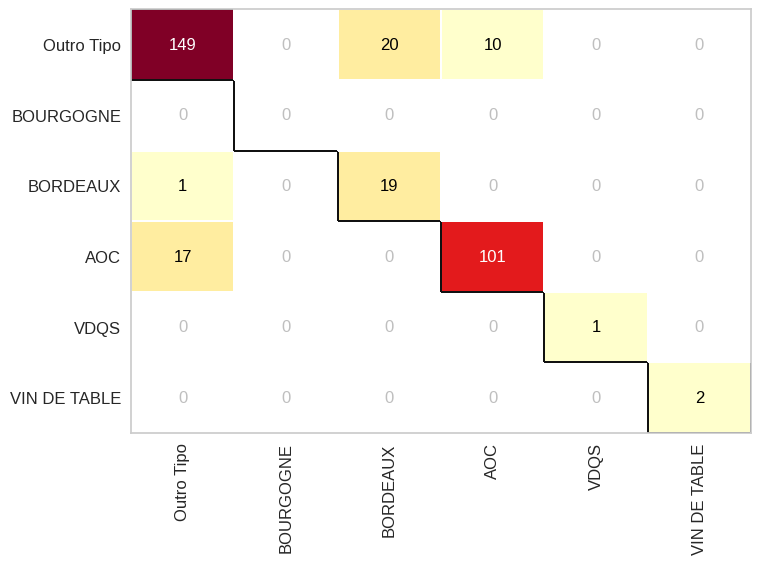

In [ ]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(
    neuronio_nb,
    classes=['Outro Tipo', 'BOURGOGNE', 'BORDEAUX', 'AOC', 'VDQS', 'VIN DE TABLE'],
    label_encoder={ 0: 'Outro Tipo', 1: 'BOURGOGNE', 2: 'BORDEAUX', 3: 'AOC', 4: 'VDQS', 5: 'VIN DE TABLE'},
    )
cm.fit(X_vinho_Treinamento, Y_vinho_treinamento)
cm.score(X_vinho_teste, Y_vinho_teste)

## Observações

O neurônio preditor acertou 149 previsões para Outro Tipo, porêm errou 20 vezes ao classifcar como Outro Tipo ao invés de Bordeaux. Da mesma forma ele errou 10 vezes definindo como Outro Tipo quando era pra ser AOC.

Já para Burgogne não foi possivel gerar nenhum classificação visto que a amostra utilizada para o treino não possuía vinhos desta categoria.

Para Bordeaux acertou 19 vezes e errou 1 vez ao defini-lo como Não Classificado. Também errou 20 vezes ao classificar como "Outro Tipo".

AOC foram 101 acertos. Sendo que ele errou 17 vezes ao classificar como AOC quando deveria ser "Outro Tipo".

já para VDQS e Vin de table, ele acertou 100% das preditivas.

In [ ]:
print(classification_report(Y_vinho_teste, neuro_predicao))

              precision    recall  f1-score   support

           0       0.89      0.83      0.86       179
           2       0.49      0.95      0.64        20
           3       0.91      0.86      0.88       118
           4       1.00      1.00      1.00         1
           5       1.00      1.00      1.00         2

    accuracy                           0.85       320
   macro avg       0.86      0.93      0.88       320
weighted avg       0.87      0.85      0.86       320



# Sugestão de melhorias

Reavaliar o sistema de classificação de mercado do vinho. A maior parte da amostra de dados não se enquadra em nenhuma das regras de classificação. Desta forma ou deve-se alterar as métricas de classificação ou ter classificações intermediárias que permitam o vinho se enquadrar em outros tipos.

A amostra dados de todas as classificações, ou seja, na ausência de dados o neorônio não tem a capacidade de entender a curva de dados da categoria para classifica-la corretamente.